# Image Stacking Test Playground
This file is a test center for stacking images. The purpose of image stacking is to enhance details by averaging out noise with multiple captures. The goal is to decide whether this will be a useful tool in our machine vision toolkit.

### Import Libraries

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import os
from skimage import io, img_as_ubyte

### Define Variables

In [35]:
path01 = 'plastic_tubes_set01'
path02 = 'plastic_tubes_set02'
path03 = 'macbook_grab_BayerRG12'

raw_image01 = io.imread('plastic_tubes_set01/image_1730334248843.png')
raw_image02 = io.imread('plastic_tubes_set02/image_1730399992230.png')
raw_image03 = io.imread('macbook_grab_BayerRG12/macbook_panelbarlight_12bit_001.tiff')

print(f"Data type of loaded image: {raw_image03.dtype}")

Data type of loaded image: uint16


### Stacking Function

In [36]:
def stacker(directory):
    images = []
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        # Check if it's an image file by extension (you can adjust as needed)
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            img = io.imread(file_path)
            images.append(img)
    # Stack images along a new axis to create a 4D array (num_images, height, width, channels)
    stacked_images = np.stack(images, axis=0)
    # print(stacked_images.shape)
    # Calculate the mean across the first axis (i.e., across all images)
    mean_image = np.mean(stacked_images, axis=0).astype(np.uint16)
    # print(mean_image.shape)
    return mean_image

In [37]:
def stacker2(directory, batch_size=100):
    file_list = [os.path.join(directory, f) for f in os.listdir(directory) 
                 if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))]
    num_files = len(file_list)
    cumulative_image = None
    count = 0

    for i in range(0, num_files, batch_size):
        batch_files = file_list[i:i + batch_size]
        batch_images = []

        for file_path in batch_files:
            img = io.imread(file_path)
            batch_images.append(img)
        
        batch_stack = np.stack(batch_images, axis=0)
        batch_mean = np.mean(batch_stack, axis=0)
        
        if cumulative_image is None:
            cumulative_image = batch_mean
        else:
            cumulative_image = (cumulative_image * count + batch_mean * len(batch_files)) / (count + len(batch_files))
        
        count += len(batch_files)
    
    return cumulative_image

### Tests

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


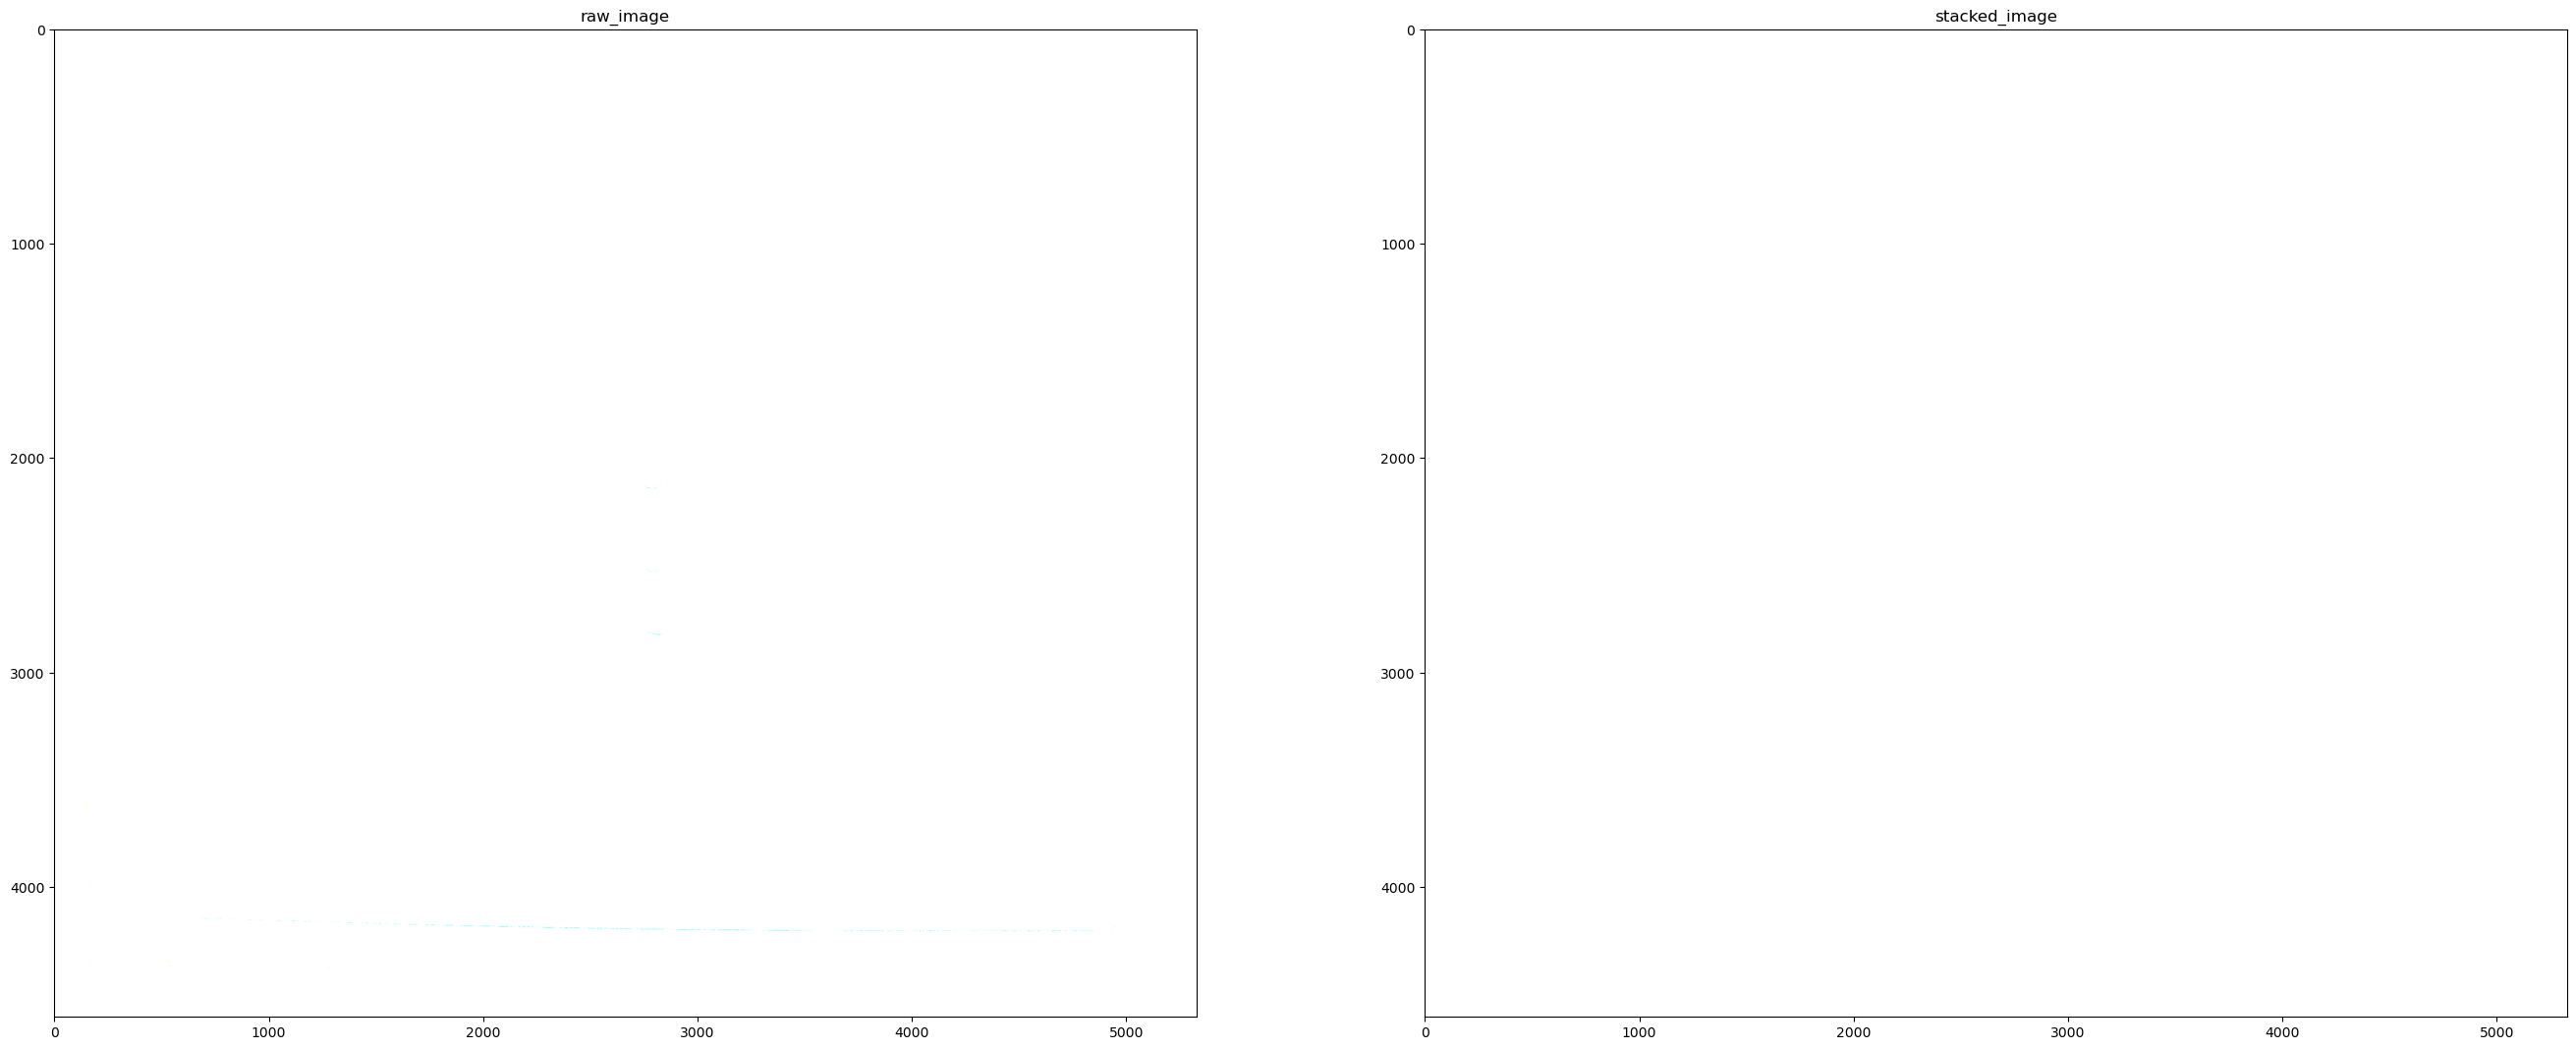

In [38]:
image01 = stacker2(path03)

fig1, axes1 = plt.subplots(1, 2, figsize=(33, 18), gridspec_kw={'width_ratios': [1, 1]})

im1 = axes1[0].imshow(raw_image03, vmin=0, vmax=4095)
axes1[0].set_title('raw_image')

im2 = axes1[1].imshow(image01.astype(int), vmin=0, vmax=4095)
axes1[1].set_title('stacked_image')

plt.show()

### Save Images

In [39]:
def save_as_png(array, filename):
    normalized_array = (array - np.min(array)) / (np.max(array) - np.min(array))
    uint8_array = img_as_ubyte(normalized_array)
    
    io.imsave(filename, uint8_array)

save_as_png(image01, 'Stackbook_12bit.png')